In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [3]:
a = 1                    #unit length of the lattice

In [4]:
# function for obtaining k_x,k_y
def f(N):
    n = np.arange(0,N,1)
    k_x = (2*np.pi*n)*(1./N)
    k_y = [[0]*N for _ in range (N)]              
    for i in range (N):
        for j in range (N):
            k_y[i][j]= ((4*np.pi*n[j]/(N*a)) - (2*np.pi*n[i]/N))* (1./np.sqrt(3))
    return k_x, k_y

#(k_x[i],k_y[i][j]) are the coordinates in momentum space.

In [5]:
# function for E_k(As 2D array)
def epsilon_k2(X, k_x, k_y, N):             
    E_k = [[0]*N for _ in range (N)]    #E_k is a 2D matrix of size N X N
    for i in range (N):
        for j in range (N):
            E_k[i][j]=-8*X*J*(np.cos(k_x[i]*a)+np.cos((k_x[i]*a/2)+(k_y[i][j]*np.sqrt(3)*a/2))+np.cos((k_x[i]*a/2)-(k_y[i][j]*np.sqrt(3)*a/2)))        
    return E_k    
                 

In [6]:
# function for E_k(As 1D array)
def epsilon_k1(X, k_x, k_y, N):             
    E_k = [0 for i in range (N)]    #E_k is a 1D matrix of size N 
    for i in range (N):
        E_k[i]=-8*X*J*(np.cos(k_x[i]*a)+np.cos((k_x[i]*a/2)+(k_y[i]*np.sqrt(3)*a/2))+np.cos((k_x[i]*a/2)-(k_y[i]*np.sqrt(3)*a/2)))        
    return np.array(E_k) 

In [7]:
# function for calculating K (if k_y is 2D array )
def K2(k_x, k_y):
    K =[[0]*len(k_x) for _ in range (len(k_x))]
    for i in range (len(k_x)):
        for j in range(len(k_y)):
            K[i][j]= np.sqrt(k_x[i]**2+k_y[i][j]**2)
    return K

In [8]:
# function for calculating K (if k_y is 1D array)
def K1(k_x, k_y):
    K = []
    for i in range (len(k_x)):
        K.append(np.sqrt(k_x[i]**2+k_y[i]**2))
    return np.array(K)
    

In [9]:
#Dispersion plotter
#Gamma = (0,0), M=(pi,pi/sqrt(3)),K = (4pi/3,0),K'= (2pi/3, 2pi/sqrt(3))
#Path is Gamma --> M --> K --> Gamma

def D_array(k_x,k_y):
    # Finding points for Gamma --> M 
    GM_x=[]
    GM_y=[]
    for i in range (len(k_x)):
        for j in range (len(k_x)):
            if ((k_y[i][j] == k_x[i]/np.sqrt(3)) and (0 < k_x[i] < np.pi or k_x[i]==0 or k_x[i]==np.pi)):
                GM_x.append(k_x[i])
                GM_y.append(k_y[i][j])
    
    # Finding points for M --> K
    MK_x=[]
    MK_y=[]
    for i in range (len(k_x)):
        for j in range (len(k_x)):
            if ((k_y[i][j]==-np.sqrt(3)*(k_x[i]-(4*np.pi/3)))and(np.pi < k_x[i] < (4*np.pi/3) or k_x[i]==np.pi or k_x[i]==(4*np.pi/3))):
                MK_x.append(k_x[i])
                MK_y.append(k_y[i][j])
    
    #Finding points for K --> Gamma
    KG_x=[]
    KG_y=[]
    for i in range (len(k_x)):
        for j in range (len(k_x)):
            if ((k_y[i][j]==0)and(0 < k_x[i] < (4*np.pi/3) or k_x[i] == 0 or k_x[i] == (4*np.pi/3))):
                KG_x.append(k_x[i])
                KG_y.append(k_y[i][j])
    
    return np.array([GM_x,GM_y]),np.array([MK_x,MK_y]),np.array([KG_x,KG_y])
    

In [9]:
M = np.sqrt((np.pi)**2+(np.pi/np.sqrt(3))**2)
K = 4*np.pi/3
Gamma = 0
print("k value for K(4pi/3, 0)is",K)
print("K value for M(2pi/3,2pi/root(3))is", M)

k value for K(4pi/3, 0)is 4.1887902047863905
K value for M(2pi/3,2pi/root(3))is 3.6275987284684357


Gamma= 0
M= 20
K= 40


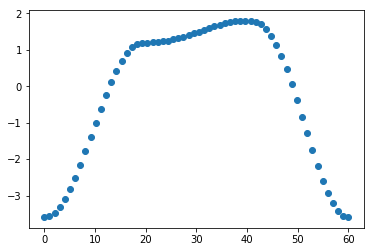

In [10]:
J = 1
X = 0.15

GM_x =np.linspace(0, np.pi, 20)
GM_y =GM_x/np.sqrt(3)

MK_x =np.linspace(np.pi, 4*np.pi/3, 20)
MK_y = -np.sqrt(3)*(MK_x-4*np.pi/3)

KM_x =np.linspace(0, 4*np.pi/3, 20)
KM_y =[0]*len(KM_x)

E_GM = epsilon_k1(X, GM_x, GM_y, len(GM_x))
E_MK = epsilon_k1(X, MK_x, MK_y, len(MK_x))
E_KM = epsilon_k1(X, KM_x[::-1], KM_y, len(KM_x))

A = np.append(E_GM, E_MK)
E1 = np.append(A, E_KM)

x = np.linspace(0, len(E1), len(E1))

plt.scatter(x,E1)
print("Gamma=",0)
print("M=",len(E_GM))
print("K=",len(E_GM)+len(E_MK))

Gamma= 0
M= 19
K= 39


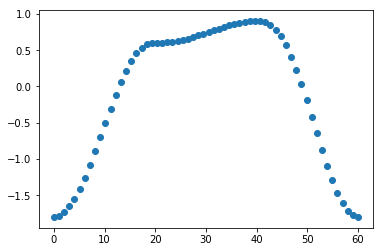

In [11]:
J=1
X=0.075

GM_x =np.linspace(0, np.pi, 20)
GM_y =GM_x/np.sqrt(3)

MK_x =np.linspace(np.pi, 4*np.pi/3, 20)
MK_y = -np.sqrt(3)*(MK_x-4*np.pi/3)

KM_x =np.linspace(0, 4*np.pi/3, 20)
KM_y =[0]*len(KM_x)

E_GM = epsilon_k1(X, GM_x, GM_y, len(GM_x))
E_MK = epsilon_k1(X, MK_x, MK_y, len(MK_x))
E_KM = epsilon_k1(X, KM_x[::-1], KM_y, len(KM_x))

A = np.append(E_GM, E_MK)
E2 = np.append(A, E_KM)

x = np.linspace(0, len(E2), len(E2))

plt.scatter(x,E2)
print("Gamma=",0)
print("M=",len(E_GM)-1)
print("K=",len(E_GM)+len(E_MK)-1)

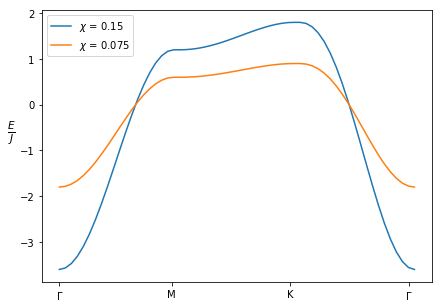

In [12]:
plt.figure(figsize =(7,5) )
plt.plot(x,E1, label='$\chi$ = 0.15')
plt.plot(x,E2, label ='$\chi$ = 0.075')
plt.legend(loc='upper left')
ax = plt.gca()
ax.xaxis.set_ticks([0, 19, 39, 59])
ax.xaxis.set_ticklabels(['$\Gamma$','M', 'K','$\Gamma$'])
plt.ylabel(r'$ \frac{E}{J}$', fontsize = 15)
plt.gca().yaxis.label.set(rotation='horizontal', ha='right');

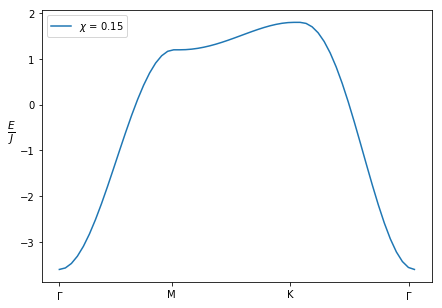

In [13]:
plt.figure(figsize =(7,5) )
plt.plot(x,E1, label='$\chi$ = 0.15')
plt.legend(loc='upper left')
ax = plt.gca()
ax.xaxis.set_ticks([0, 19, 39, 59])
ax.xaxis.set_ticklabels(['$\Gamma$','M', 'K','$\Gamma$'])
plt.ylabel(r'$ \frac{E}{J}$', fontsize = 15)
plt.gca().yaxis.label.set(rotation='horizontal', ha='right');

NNN dispersion:

E_k = -2t $\sum_{\alpha\in\{u, v, w\}}cos(k.\alpha)$ -2t' $\sum_{\beta\in\{x, y, z\}}cos(k.\beta)$

u = (a,0)
v = (a/2, root(3)a/2)
w = (a/2, -root(3)a/2)

x=(0, root(3)a)
y=(3a/2, -root(3)a/2)
z=(-3a/2, -root(3)a/2)

In [10]:
def epsilon_NNN(X, Y, k_x, k_y, N):
    E_k = [0 for i in range (N)]    #E_k is a 1D matrix of size N 
    for i in range (N):
        e1 = 0
        e2 = 0
        e1 = -8*X*J*(np.cos(k_x[i]*a)+np.cos((k_x[i]*a/2)+(k_y[i]*np.sqrt(3)*a/2))+np.cos((k_x[i]*a/2)-(k_y[i]*np.sqrt(3)*a/2)))
        e2 = -8*Y*J_1*(np.cos(k_y[i]*a*np.sqrt(3))+np.cos((3*k_x[i]*a/2)-(k_y[i]*np.sqrt(3)*a/2))+np.cos((-3*k_x[i]*a/2)-(k_y[i]*np.sqrt(3)*a/2)))
        E_k[i]= e1+e2
    return np.array(E_k)



In [ ]:
N = 10
k_x, k_y = f(N)

a = 1
J = 1
J_1 = 1

X = 0.2
Y = 0.1

epsilon_NNN(X,Y)

In [15]:
'''J = 1
X = 0.15
J_1 = 0.11
Y = 0.2'''

'J = 1\nX = 0.15\nJ_1 = 0.11\nY = 0.2'

In [16]:
np.linspace(0.11,0.2,3)

array([0.11 , 0.155, 0.2  ])

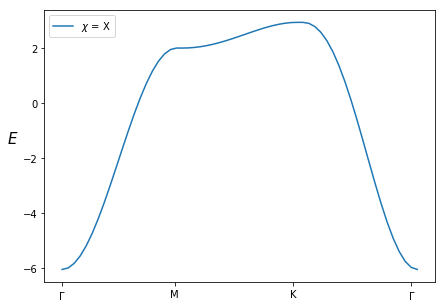

In [17]:
J = 1
X = 0.25
J_1 = 0.01
Y = 0.2


GM_x =np.linspace(0, np.pi, 20)
GM_y =GM_x/np.sqrt(3)
    
MK_x =np.linspace(np.pi, 4*np.pi/3, 20)
MK_y = -np.sqrt(3)*(MK_x-4*np.pi/3)

KM_x =np.linspace(0, 4*np.pi/3, 20)
KM_y =[0]*len(KM_x)
        
E_GM = epsilon_NNN(X, Y, GM_x, GM_y, len(GM_x))
E_MK = epsilon_NNN(X, Y, MK_x, MK_y, len(MK_x))
E_KM = epsilon_NNN(X, Y, KM_x[::-1], KM_y, len(KM_x))
    
A = np.append(E_GM, E_MK)
E0 = np.append(A, E_KM)
    
x = np.linspace(0, len(E0), len(E0))
    
plt.figure(figsize =(7,5) )
plt.plot(x,E0, label='$\chi$ = X')
plt.legend(loc='upper left')
ax = plt.gca()
ax.xaxis.set_ticks([0, 19, 39, 59])
ax.xaxis.set_ticklabels(['$\Gamma$','M', 'K','$\Gamma$'])
plt.ylabel(r'$ E $', fontsize = 15)
plt.gca().yaxis.label.set(rotation='horizontal', ha='right');

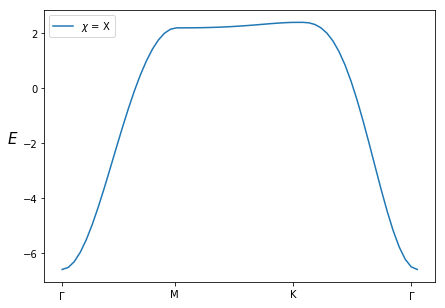

In [18]:
J = 1
X = 0.25
J_1 = 0.125
Y = 0.2


GM_x =np.linspace(0, np.pi, 20)
GM_y =GM_x/np.sqrt(3)
    
MK_x =np.linspace(np.pi, 4*np.pi/3, 20)
MK_y = -np.sqrt(3)*(MK_x-4*np.pi/3)

KM_x =np.linspace(0, 4*np.pi/3, 20)
KM_y =[0]*len(KM_x)
        
E_GM = epsilon_NNN(X, Y, GM_x, GM_y, len(GM_x))
E_MK = epsilon_NNN(X, Y, MK_x, MK_y, len(MK_x))
E_KM = epsilon_NNN(X, Y, KM_x[::-1], KM_y, len(KM_x))
    
A = np.append(E_GM, E_MK)
E1 = np.append(A, E_KM)
    
x = np.linspace(0, len(E1), len(E1))
    
plt.figure(figsize =(7,5) )
plt.plot(x,E1, label='$\chi$ = X')
plt.legend(loc='upper left')
ax = plt.gca()
ax.xaxis.set_ticks([0, 19, 39, 59])
ax.xaxis.set_ticklabels(['$\Gamma$','M', 'K','$\Gamma$'])
plt.ylabel(r'$ E $', fontsize = 15)
plt.gca().yaxis.label.set(rotation='horizontal', ha='right');

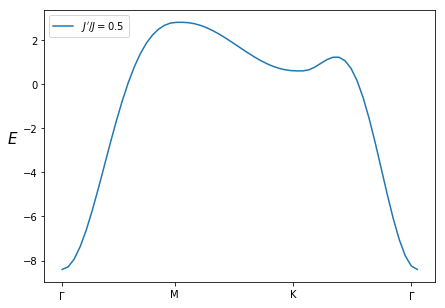

In [19]:
J = 1
X = 0.25
J_1 = 0.5
Y = 0.2


GM_x =np.linspace(0, np.pi, 20)
GM_y =GM_x/np.sqrt(3)
    
MK_x =np.linspace(np.pi, 4*np.pi/3, 20)
MK_y = -np.sqrt(3)*(MK_x-4*np.pi/3)

KM_x =np.linspace(0, 4*np.pi/3, 20)
KM_y =[0]*len(KM_x)
        
E_GM = epsilon_NNN(X, Y, GM_x, GM_y, len(GM_x))
E_MK = epsilon_NNN(X, Y, MK_x, MK_y, len(MK_x))
E_KM = epsilon_NNN(X, Y, KM_x[::-1], KM_y, len(KM_x))
    
A = np.append(E_GM, E_MK)
E_2 = np.append(A, E_KM)
    
x = np.linspace(0, len(E_2), len(E_2))
    
plt.figure(figsize =(7,5) )
plt.plot(x,E_2, label='$ J\'/J=0.5$' )
plt.legend(loc='upper left')
ax = plt.gca()
ax.xaxis.set_ticks([0, 19, 39, 59])
ax.xaxis.set_ticklabels(['$\Gamma$','M', 'K','$\Gamma$'])
plt.ylabel(r'$ E $', fontsize = 15)
plt.gca().yaxis.label.set(rotation='horizontal', ha='right');

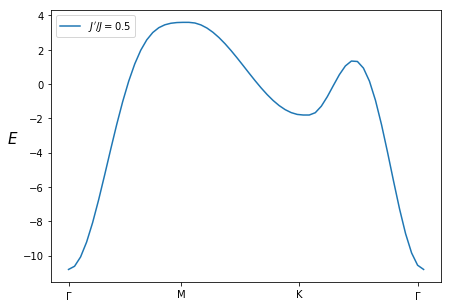

In [20]:
J = 1
X = 0.25
J_1 = 1
Y = 0.2


GM_x =np.linspace(0, np.pi, 20)
GM_y =GM_x/np.sqrt(3)
    
MK_x =np.linspace(np.pi, 4*np.pi/3, 20)
MK_y = -np.sqrt(3)*(MK_x-4*np.pi/3)

KM_x =np.linspace(0, 4*np.pi/3, 20)
KM_y =[0]*len(KM_x)
        
E_GM = epsilon_NNN(X, Y, GM_x, GM_y, len(GM_x))
E_MK = epsilon_NNN(X, Y, MK_x, MK_y, len(MK_x))
E_KM = epsilon_NNN(X, Y, KM_x[::-1], KM_y, len(KM_x))
    
A = np.append(E_GM, E_MK)
E_3 = np.append(A, E_KM)
    
x = np.linspace(0, len(E_3), len(E_3))
    
plt.figure(figsize =(7,5) )
plt.plot(x,E_3, label='$ J\'/J=0.5$' )
plt.legend(loc='upper left')
ax = plt.gca()
ax.xaxis.set_ticks([0, 19, 39, 59])
ax.xaxis.set_ticklabels(['$\Gamma$','M', 'K','$\Gamma$'])
plt.ylabel(r'$ E $', fontsize = 15)
plt.gca().yaxis.label.set(rotation='horizontal', ha='right');

Text(0.5,1,'For $\\chi=0.25$, $\\gamma=0.2$')

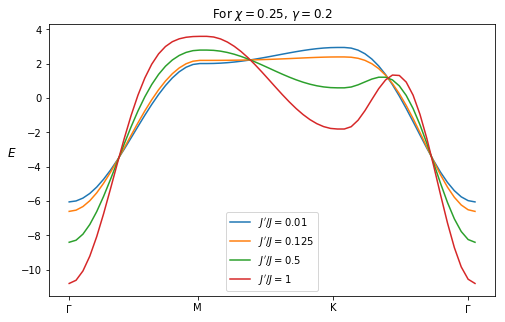

In [24]:
plt.figure(figsize =(8,5) )
plt.plot(x, E0, label = '$ J\'/J=0.01$')
plt.plot(x, E1, label = '$ J\'/J=0.125$')
plt.plot(x, E_2, label = '$ J\'/J=0.5$')
plt.plot(x, E_3, label = '$ J\'/J=1$')

plt.legend(loc='lower center')
ax = plt.gca()
ax.xaxis.set_ticks([0, 19, 39, 59])
ax.xaxis.set_ticklabels(['$\Gamma$','M', 'K','$\Gamma$'])
plt.ylabel(r'$ E $', fontsize = 12)
plt.gca().yaxis.label.set(rotation='horizontal', ha='right');
plt.title('For $\chi=0.25$, $\gamma=0.2$')

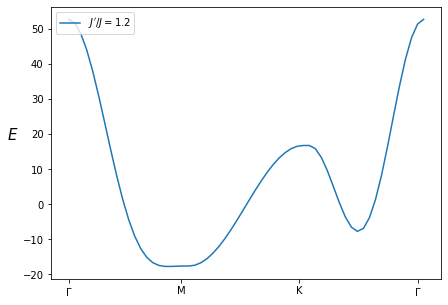

In [18]:
J = 1
X = -1
J_1 = 1.2
Y = -1


GM_x =np.linspace(0, np.pi, 20)
GM_y =GM_x/np.sqrt(3)
    
MK_x =np.linspace(np.pi, 4*np.pi/3, 20)
MK_y = -np.sqrt(3)*(MK_x-4*np.pi/3)

KM_x =np.linspace(0, 4*np.pi/3, 20)
KM_y =[0]*len(KM_x)
        
E_GM = epsilon_NNN(X, Y, GM_x, GM_y, len(GM_x))
E_MK = epsilon_NNN(X, Y, MK_x, MK_y, len(MK_x))
E_KM = epsilon_NNN(X, Y, KM_x[::-1], KM_y, len(KM_x))
    
A = np.append(E_GM, E_MK)
E_3 = np.append(A, E_KM)
    
x = np.linspace(0, len(E_3), len(E_3))
    
plt.figure(figsize =(7,5) )
plt.plot(x,E_3, label='$ J\'/J=1.2$' )
plt.legend(loc='upper left')
ax = plt.gca()
ax.xaxis.set_ticks([0, 19, 39, 59])
ax.xaxis.set_ticklabels(['$\Gamma$','M', 'K','$\Gamma$'])
plt.ylabel(r'$ E $', fontsize = 15)
plt.gca().yaxis.label.set(rotation='horizontal', ha='right');